<a href="https://colab.research.google.com/github/KornelWitkowski/TensorFlow-benchmarks/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP

## goemotions

### Data exploration

In [ ]:
import tensorflow_datasets as tfds

dataset_goemotions = tfds.load("goemotions")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/43410 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/goemotions/0.1.0.incompleteW4Y8OG/goemotions-train.tfrecord*...:   0%|        …

Generating validation examples...:   0%|          | 0/5426 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/goemotions/0.1.0.incompleteW4Y8OG/goemotions-validation.tfrecord*...:   0%|   …

Generating test examples...:   0%|          | 0/5427 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/goemotions/0.1.0.incompleteW4Y8OG/goemotions-test.tfrecord*...:   0%|         …

Dataset goemotions downloaded and prepared to ~/tensorflow_datasets/goemotions/0.1.0. Subsequent calls will reuse this data.


In [ ]:
test_data = dataset_goemotions["test"]
train_data = dataset_goemotions["train"]
validation_data = dataset_goemotions["validation"]

In [ ]:
len(train_data), len(test_data), len(validation_data)

(43410, 5427, 5426)

In [ ]:
test_data = tfds.as_dataframe(test_data)
train_data = tfds.as_dataframe(train_data)
validation_data = tfds.as_dataframe(validation_data)

In [ ]:
test_data.head()

,admiration,amusement,anger,annoyance,approval,caring,comment_text,confusion,curiosity,desire,...,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
0,False,False,False,False,True,False,"b""You're right, thanks for pointing that out, ...",False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,b'Molon labe!!!',False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,b'So this is what edging feels like',False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,b'Just speak with a Sheffield accent lmao',False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,b'My husband and I have been circling the drai...,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
class_names = list(test_data.drop("comment_text", axis=1).columns)
print(class_names)

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'neutral', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise']


In [ ]:
import re

strip = lambda x: re.findall(r"b['\"](.+)['\"]", x)[0]
replace = lambda x: x.replace('\\xe2\\x80\\x99', "'")

def process_dataframe(df):

  df_labels = df.drop("comment_text", axis=1).astype(int)
  df_sentences = df["comment_text"].astype('string')

  df_sentences = df_sentences.map(strip)
  df_sentences = df_sentences.map(replace)

  return df_sentences, df_labels

In [ ]:
train_sentences, train_labels = process_dataframe(train_data)
test_sentences, test_labels = process_dataframe(test_data)
valid_sentences, valid_labels = process_dataframe(validation_data)

valid_sentences.head(10)

0    Wait, I see the problem, you are changing the ...
1             We are there right now. \xf0\x9f\x8d\xba
2    I usually do. I didn't stay up until midnight ...
3    Just as delusional as [NAME] was. The differen...
4    Did you miss the massive throbbing erection th...
5    Probably because every day several people ask ...
6    Bad execution but it made me smile through the...
7    Are you willing to donate to local organizatio...
8                                Happy birtday my dude
9    Are they bigger than our defensive breakdowns ...
Name: comment_text, dtype: object

In [ ]:
valid_labels.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
counts = valid_labels.sum(axis=0).sort_values()
counts

grief               13
pride               15
relief              18
nervousness         21
embarrassment       35
remorse             68
desire              77
fear                90
excitement          96
disgust             97
realization        127
surprise           129
sadness            143
confusion          152
caring             153
disappointment     163
joy                172
anger              195
optimism           209
curiosity          248
love               252
disapproval        292
annoyance          303
amusement          303
gratitude          358
approval           397
admiration         488
neutral           1766
dtype: int64

Text(0.5, 1.0, 'Test data')

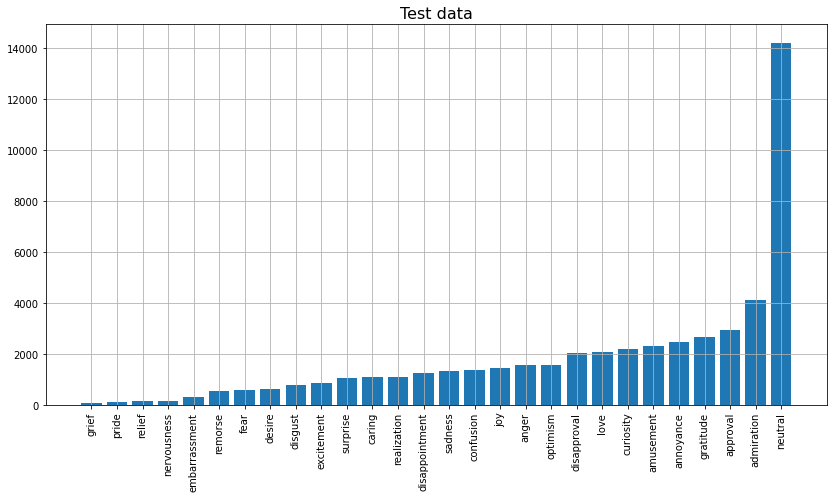

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 7))
plt.bar(counts.index, counts);
plt.grid(True)
plt.xticks(rotation=90);
plt.title("Test data", fontsize=16)

In [ ]:
# baseline prediction: every comment is neutral

counts["neutral"]/counts.sum()

0.2768025078369906

Text(0.5, 1.0, 'Train data')

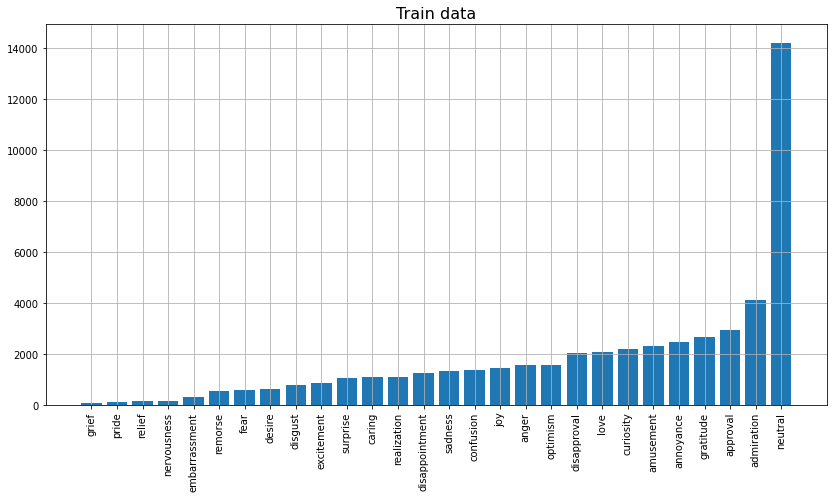

In [ ]:
counts = train_labels.sum(axis=0).sort_values()

fig = plt.figure(figsize=(14, 7))
plt.bar(counts.index, counts);
plt.grid(True)
plt.xticks(rotation=90);
plt.title("Train data", fontsize=16)

### Data augmentation & dataset preparation

In [ ]:
pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 5.2 MB/s 


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.1 MB/s 
     |████████████████████████████████| 101 kB 13.8 MB/s 
     |████████████████████████████████| 596 kB 70.0 MB/s 
     |████████████████████████████████| 6.6 MB 32.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import nlpaug.augmenter.word as naw

text = "This is a serviceable definition good enough for the purposes of this book."

In [ ]:
aug_bert = naw.ContextualWordEmbsAug(model_path='distilbert-base-uncased', 
                                     action='insert')
print("Original:")
print(text)
print("Augmented Text:")
for _ in range(5):
    augmented_text = aug_bert.augment(text)
    print(augmented_text)

Original:
This is a serviceable definition good enough for the purposes of this book.
Augmented Text:
['this is a globally serviceable metadata definition good enough accessible for the purposes proper of this standard book.']
['this term is a legally serviceable definition rendered good enough merely for the purposes of reviewing this book.']
['this is a more serviceable definition good enough now for serving the purposes speaking of this source book.']
['this page is actually a serviceable definition good enough information for the general purposes sections of this book.']
['this is a serviceable definition of good just enough for the technical purposes required of expanding this book.']


In [ ]:
aug_synonym = naw.SynonymAug(aug_min=0, aug_max=2, aug_p=0.2)

print("Original:")
print(text)
print("Augmented Text:")
for _ in range(5):
    augmented_text = aug_synonym.augment(text)
    print(augmented_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Original:
This is a serviceable definition good enough for the purposes of this book.
Augmented Text:


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['This constitute a serviceable definition good enough for the purposes of this book.']
['This is a serviceable definition honorable enough for the purpose of this book.']
['This is a serviceable definition good enough for the purposes of this book.']
['This be a serviceable definition good plenty for the purposes of this book.']
['This represent a serviceable definition good enough for the purposes of this book.']


In [ ]:
import nlpaug.flow.sequential as naf

aug = naf.Sequential([aug_bert, aug_synonym])

aug.augment(text, n=10)

['this language is a serviceable spoken language definition fully respectable enough for the purposes outlined of this instruction book.',
 '“ this quotation is evidently a serviceable definition good old enough for the purposes of this companion book.',
 'this phrase is a relatively serviceable descriptive definition good enough for expressing the purposes surgical incision of this book.',
 'this is a serviceable research definition ripe enough for considering the specific purposes of presenting this complete book.',
 "this is basically a fairly serviceable definition not good enough available for the purpose of this fact al qur'an.",
 '• this is a serviceable definition good delimit enough clearly for the purposes section of this fact book.',
 'this is probably a very serviceable descriptive definition good descriptive enough for determining the intention of this book.',
 'this terminology is deemed a truly serviceable definition good plenty for the purposes specified of this referen

In [ ]:
import pandas as pd

aug_sent = pd.Series()
aug_labels = pd.DataFrame(columns=train_labels.columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
griefing = (train_labels["grief"] == 1)
train_sentences[griefing]

271                                     She's passed away.
1023                                  Her accent!! I died.
1196                            My life has been destroyed
2198                My thoughts EXACTLY [NAME] looks dead.
2283     Actually feel sorry for her. She has depressio...
                               ...                        
42141    youve never played against a good support [NAM...
42204    I'm sorry for your loss bro \xe2\x9d\xa4\xef\x...
42296    Sorry to hear it man. Grief is the appropriate...
42519    Thank you for sharing this. May your friend re...
42645    I hate to be the bearer of bad news but she is...
Name: comment_text, Length: 77, dtype: object

In [ ]:
def create_augmented_comments(sentences, labels, columns, n):

  """
    senteces - full dataframe of sentences
    labels - full datafram of labels
    colums - target emotion to generate augmented comments 
    n - list of how many given sentence in column should be augmented. 

    Result:
    aug_sent - augmented sentences
    aug_labels - labels of augmented sentences

    The function creates a dataframe with augmented sentences.
    For example: if we have given list of columns  [grief, pride, relief, nervousness], then
    n = [5, 3, 2, 1] means that each sentences from 'grief' will be used to generated 5 
    new augmented sentences, each sentence from 'pride' will create 3 new sentences

    !!! WARINING: function works slowly.

  """

  aug_sent = pd.Series()
  aug_labels = pd.DataFrame(columns=train_labels.columns)

  for k, emotion in enumerate(columns):
    emotion_rows = (train_labels[emotion] == 1)
    indicies = griefing[ emotion_rows].index

    for i in indicies:
      sentence = train_sentences.iloc[i]
      augmented_sentences = aug.augment(sentence, n=n[k])

      for aug_sentence in augmented_sentences:
          aug_sent = aug_sent.append(pd.Series([aug_sentence]), ignore_index=True)
          aug_labels = aug_labels.append(train_labels.iloc[i], ignore_index=True)

  return aug_sent, aug_labels

In [ ]:
round(500/counts.head(10))

grief            6.0
pride            5.0
relief           3.0
nervousness      3.0
embarrassment    2.0
remorse          1.0
fear             1.0
desire           1.0
disgust          1.0
excitement       1.0
dtype: float64

In [101]:
the_least_frequent_emotions = list(counts.index[:5])

aug_sentences, aug_sent_labels = create_augmented_comments(train_sentences, train_labels, columns=the_least_frequent_emotions, n=[6, 5, 3, 3, 2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [102]:
aug_sentences

0                         she ' have s passed miles away.
1                           she ' a s passed safely away.
2                           and she ' his s passed aside.
3                    possibly she ' s already passed out.
4                             she ' ve s passed miles by.
                              ...                        
2569    we rip time waste sloppy editing, its a shame ...
2570                            it ' d s scarcely hinder!
2571         and it ' s to a greater extent embarrassing!
2572    huh is information technology kinda weird that...
2573    how be it weird that basically my real first r...
Length: 2574, dtype: object

In [103]:
aug_sent_labels

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2572,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
train_sentences_with_aug = pd.concat([train_sentences, aug_sentences]).reset_index(drop=True)
train_labels_with_aug = pd.concat([train_labels, aug_sent_labels]).reset_index(drop=True).astype(int)

train_sentences_with_aug

0        It's just wholesome content, from questionable...
1                                This is actually awesome.
2        People really spend more than $10 in an app ga...
3        I grew up on the other side of Ama but live in...
4        What the problem? I mean, steak? Good. Doughnu...
                               ...                        
45979    we rip time waste sloppy editing, its a shame ...
45980                            it ' d s scarcely hinder!
45981         and it ' s to a greater extent embarrassing!
45982    huh is information technology kinda weird that...
45983    how be it weird that basically my real first r...
Length: 45984, dtype: object

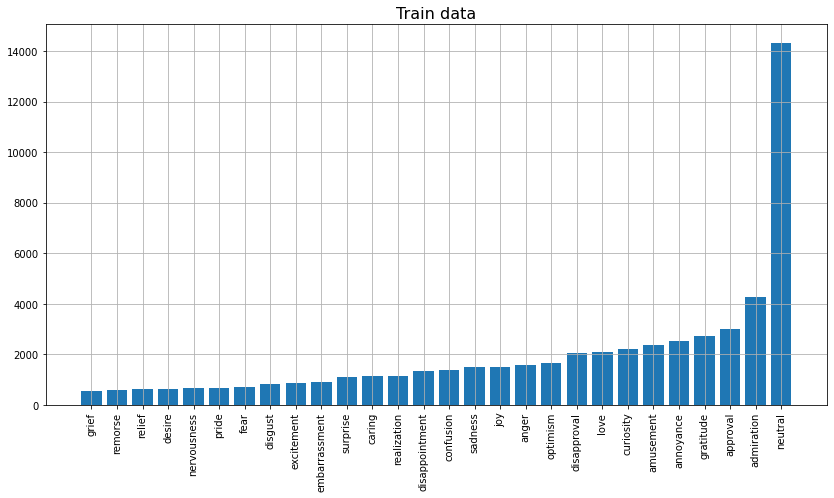

In [133]:
counts = train_labels_with_aug.sum(axis=0).sort_values()

fig = plt.figure(figsize=(14, 7))
plt.bar(counts.index, counts);
plt.grid(True)
plt.xticks(rotation=90);
plt.title("Train data", fontsize=16);

In [134]:
train_labels_with_aug

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45982,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
import tensorflow as tf

def prepare_dataset(sentences, labels, batch_size=128, shuffle_size=1000):
  ds = tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(sentences), tf.convert_to_tensor(labels)))
  ds = ds.batch(batch_size).shuffle(shuffle_size).prefetch(tf.data.AUTOTUNE)
  return ds

valid_ds = prepare_dataset(valid_sentences, valid_labels)
test_ds = prepare_dataset(test_sentences, test_labels)
train_ds = prepare_dataset(train_sentences_with_aug, train_labels_with_aug)

### Text digitalization

In [143]:
avg_words = 0
for sentence in train_sentences_with_aug:
  avg_words += len(sentence.split())

avg_words/len(train_sentences_with_aug)

13.330854210160055

In [148]:
from tensorflow.keras.layers import TextVectorization

vocab_length = 40000
sentence_length = 20

text_vectorizer = TextVectorization(max_tokens=vocab_length,
                                    output_mode="int",
                                    output_sequence_length=sentence_length)

In [149]:
text_vectorizer.adapt(train_sentences_with_aug)

In [150]:
sample_sentence = "A an the I you she he it play plays like would purple crimson"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 20), dtype=int64, numpy=
array([[    5,    57,     2,     3,     6,    60,    33,    10,   231,
         1351,    26,    49,  2882, 26969,     0,     0,     0,     0,
            0,     0]])>

In [151]:
import random

random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
That's gonna be a no from me, [NAME]!      

Vectorized version:


<tf.Tensor: shape=(1, 20), dtype=int64, numpy=
array([[ 47, 256,  21,   5,  41,  56,  30,  11,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]])>

In [152]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_10_words = words_in_vocab[:10]

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 10 most common words: {top_10_words}") 

Number of words in vocab: 30340
Top 10 most common words: ['', '[UNK]', 'the', 'i', 'to', 'a', 'you', 'and', 'is', 'that']


In [153]:
from tensorflow.keras.layers import Embedding

embedding = Embedding(input_dim=len(words_in_vocab),
                      output_dim=64,
                      input_length=sentence_length) 

### Model & Traning

In [170]:
from tensorflow.keras.layers import Bidirectional, Dense, Dropout, Flatten, Input, LSTM
from tensorflow.keras.metrics import Precision, Recall

from utils import create_model_checkpoint, reduce_lr

tf.random.set_seed(42)

inputs = Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.4), name="Bidirectional_LSTM_1")(x)
x = Bidirectional(LSTM(128, dropout=0.4), name="Bidirectional_LSTM_2")(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
outputs = Dense(28, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs, name="model_goemotions")

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy", Precision(), Recall()])

history = model.fit(train_ds,
                    epochs=10,
                    validation_data=valid_ds,
                    callbacks=[create_model_checkpoint(model.name), reduce_lr()])

Epoch 1/10
360/360 [==============================] - ETA: 0s - loss: 0.1212 - accuracy: 0.4696 - precision_5: 0.7342 - recall_5: 0.2944

INFO:tensorflow:Assets written to: models/model_goemotions/assets


INFO:tensorflow:Assets written to: models/model_goemotions/assets


360/360 [==============================] - 38s 88ms/step - loss: 0.1212 - accuracy: 0.4696 - precision_5: 0.7342 - recall_5: 0.2944 - val_loss: 0.1199 - val_accuracy: 0.4689 - val_precision_5: 0.6266 - val_recall_5: 0.3475 - lr: 0.0100
Epoch 2/10
360/360 [==============================] - 7s 19ms/step - loss: 0.0848 - accuracy: 0.6186 - precision_5: 0.7999 - recall_5: 0.4798 - val_loss: 0.1237 - val_accuracy: 0.4677 - val_precision_5: 0.5919 - val_recall_5: 0.3674 - lr: 0.0100
Epoch 3/10
360/360 [==============================] - 7s 18ms/step - loss: 0.0778 - accuracy: 0.6548 - precision_5: 0.8103 - recall_5: 0.5361 - val_loss: 0.1296 - val_accuracy: 0.4604 - val_precision_5: 0.5786 - val_recall_5: 0.3831 - lr: 0.0100
Epoch 4/10
359/360 [============================>.] - ETA: 0s - loss: 0.0745 - accuracy: 0.6702 - precision_5: 0.8180 - recall_5: 0.5592
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
360/360 [==============================] - 7s 19ms/step - l

In [171]:
train_ds_not_augmented = prepare_dataset(train_sentences, train_labels)

### Results

In [172]:
model_best = tf.keras.models.load_model("models/model_goemotions")

_, train_acc, train_precision, train_recall = model_best.evaluate(train_ds_not_augmented)
_, test_acc, test_precision, test_recall = model_best.evaluate(test_ds)

43/43 [==============================] - 0s 8ms/step - loss: 0.1215 - accuracy: 0.4538 - precision_5: 0.6190 - recall_5: 0.3395


In [173]:
print(f"Train accuracy: {train_acc}")
print(f"Train precision: {train_precision}")
print(f"Test accuracy: {test_acc}")
print(f"Test precision: {test_precision}")

Train accuracy: 0.6717115640640259
Train precision: 0.8637212514877319
Test accuracy: 0.453841894865036
Test precision: 0.6189516186714172


### Tests

In [188]:
classes = pd.Series(class_names)

grief_sentence = "My grandfather died"
desire_sentence = "I want these clothes now! They are amazing."
surprise_sentence = "I'm surprised. I didn't expected such the outcome."

In [186]:
classes[(model_best.predict([grief_sentence]) > 0.5).flatten()]

15    gratitude
dtype: object

In [187]:
classes[(model_best.predict([desire_sentence]) > 0.5).flatten()]

0    admiration
dtype: object

In [189]:
classes[(model_best.predict([desire_sentence]) > 0.5).flatten()]

0    admiration
dtype: object

## imdb_reviews

### Data preparation

In [224]:
train_data, validation_data, test_data = tfds.load(name="imdb_reviews", 
                                                   split=('train', 'test[50%:]', 'test[:50%]'),
                                                   as_supervised=True)

In [225]:
len(train_data), len(validation_data), len(test_data)

(25000, 12500, 12500)

In [226]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(32)))

for review in train_examples_batch:
  print(review.numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [199]:
train_labels_batch

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([0, 0, 0])>

In [264]:
import numpy as np

def get_sentences_and_labels_from_dataset(ds):
    sentence = np.asarray([sentence for sentence, label in ds])
    labels = np.asarray([label for sentence, label in ds])
    return sentence, labels

In [280]:
test_sentences, test_labels = get_sentences_and_labels_from_dataset(test_data)
train_sentences, train_labels = get_sentences_and_labels_from_dataset(train_data)
validation_sentences, validation_labels = get_sentences_and_labels_from_dataset(validation_data)

In [260]:
import re

tensor_to_string = lambda x: str(x.numpy())
strip_1 = lambda x: re.sub(r'<.*?>', ' ',x) # strip tags
strip_2 = lambda x: re.findall(r"b['\"](.+)['\"]", x)[0] # strip b"..." or b'...'
replace = lambda x: x.replace('\\xe2\\x80\\x99', "'")

def process_sentences(sentences):

  sentences = pd.Series(sentences)
  sentences = sentences.map(tensor_to_string)
  sentences = sentences.map(strip_1)
  sentences = sentences.map(strip_2)
  sentences = sentences.map(replace)

  return sentences

In [281]:
train_sentences = process_sentences(train_sentences)
test_sentences = process_sentences(test_sentences)
valid_sentences = process_sentences(validation_sentences)

In [285]:
avg_words_in_review = 0
for sentence in train_sentences:
  avg_words_in_review += len(sentence.split())

avg_words_in_review/len(train_sentences)

231.47512

In [270]:
from tensorflow.keras.layers import TextVectorization

vocab_length = 40000
sentence_length = 250

text_vectorizer = TextVectorization(max_tokens=vocab_length,
                                    output_mode="int",
                                    output_sequence_length=sentence_length)

In [275]:
text_vectorizer.adapt(train_sentences)

In [278]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_10_words = words_in_vocab[:10]

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 10 most common words: {top_10_words}") 

Number of words in vocab: 40000
Top 10 most common words: ['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it']


In [287]:
import tensorflow as tf

def prepare_dataset(sentences, labels, batch_size=128, shuffle_size=1000):
  ds = tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(sentences), tf.convert_to_tensor(labels)))
  ds = ds.batch(batch_size).shuffle(shuffle_size).prefetch(tf.data.AUTOTUNE)
  return ds

valid_ds = prepare_dataset(valid_sentences, validation_labels)
test_ds = prepare_dataset(test_sentences, test_labels)
train_ds = prepare_dataset(train_sentences, train_labels)

### Model & Traning

In [288]:
from tensorflow.keras.layers import Embedding

embedding = Embedding(input_dim=len(words_in_vocab),
                      output_dim=128,
                      input_length=sentence_length) 

In [292]:
from tensorflow.keras.layers import Bidirectional, Dense, Dropout, Flatten, Input, LSTM
from tensorflow.keras.metrics import Precision, Recall

from utils import create_model_checkpoint, reduce_lr

inputs = Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.4), name="Bidirectional_LSTM_1")(x)
x = Bidirectional(LSTM(128, dropout=0.4), name="Bidirectional_LSTM_2")(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs, name="model_imdb_reviews")

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

history = model.fit(train_ds,
                    epochs=10,
                    validation_data=valid_ds,
                    callbacks=[create_model_checkpoint(model.name), reduce_lr()])

Epoch 1/10
196/196 [==============================] - ETA: 0s - loss: 0.2484 - accuracy: 0.9008

INFO:tensorflow:Assets written to: models/model_imdb_reviews/assets


INFO:tensorflow:Assets written to: models/model_imdb_reviews/assets


196/196 [==============================] - 50s 230ms/step - loss: 0.2484 - accuracy: 0.9008 - val_loss: 0.4866 - val_accuracy: 0.8298 - lr: 0.0100
Epoch 2/10
196/196 [==============================] - 23s 115ms/step - loss: 0.0979 - accuracy: 0.9687 - val_loss: 0.5011 - val_accuracy: 0.8253 - lr: 0.0100
Epoch 3/10
196/196 [==============================] - 23s 115ms/step - loss: 0.0522 - accuracy: 0.9848 - val_loss: 0.8451 - val_accuracy: 0.8243 - lr: 0.0100
Epoch 4/10
196/196 [==============================] - ETA: 0s - loss: 0.0369 - accuracy: 0.9895
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
196/196 [==============================] - 22s 113ms/step - loss: 0.0369 - accuracy: 0.9895 - val_loss: 0.8671 - val_accuracy: 0.8041 - lr: 0.0100
Epoch 5/10
196/196 [==============================] - 22s 112ms/step - loss: 0.0177 - accuracy: 0.9952 - val_loss: 0.9227 - val_accuracy: 0.8206 - lr: 1.0000e-03
Epoch 6/10
196/196 [==============================] - 22

### Results

In [293]:
model_best = tf.keras.models.load_model("models/model_imdb_reviews")

_, train_acc = model_best.evaluate(train_ds)
_, test_acc = model_best.evaluate(test_ds)

98/98 [==============================] - 4s 37ms/step - loss: 0.4752 - accuracy: 0.8320


In [294]:
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.9804800152778625
Test accuracy: 0.8320000171661377
